In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/drive/MyDrive/pollution_dataset.csv')

In [3]:
data.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [5]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data['Air Quality']=enc.fit_transform(data['Air Quality'])

In [6]:
data.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                            6.3                 319            2  
1                            6.0                 611            2  
2                            5.2                 619            2  
3                           11.1                 551            0  
4                           12.7                 303            0

In [8]:
data.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Air Quality', ylabel='count'>

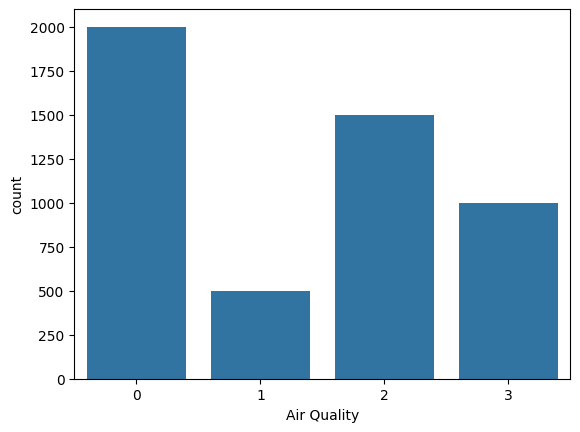

In [10]:
sns.countplot(data, x="Air Quality")

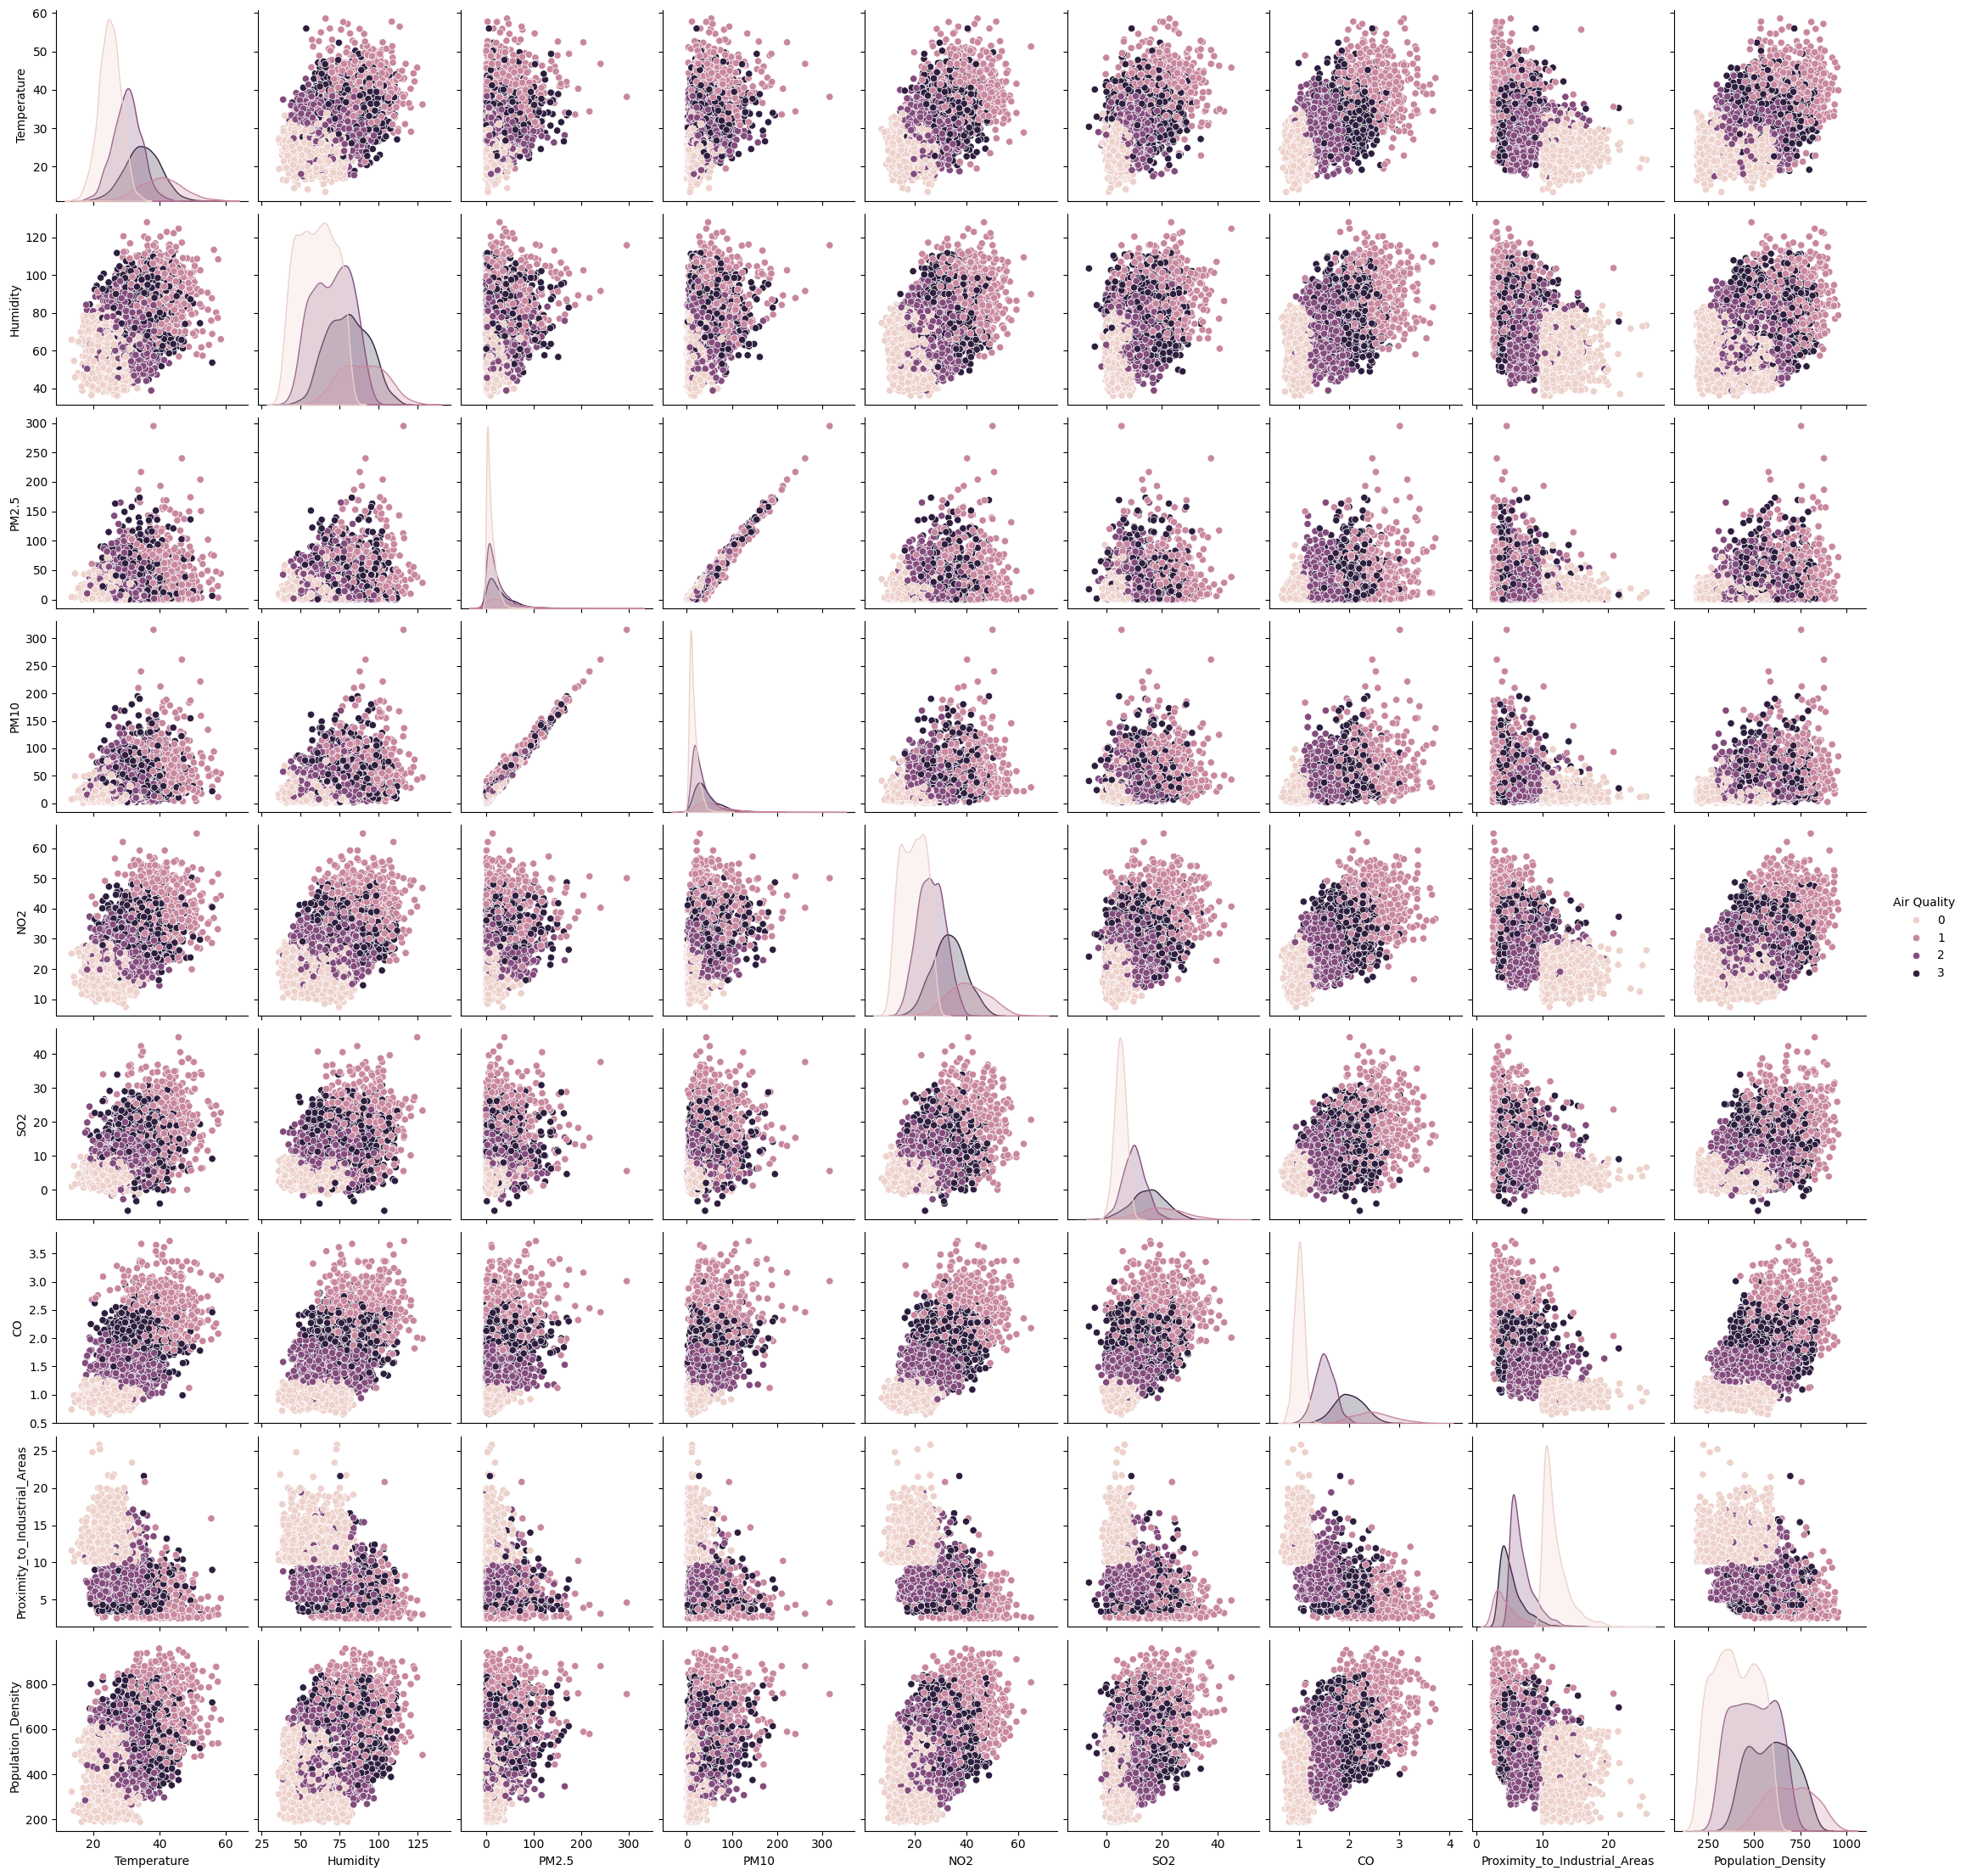

In [11]:
sns.pairplot(data, hue="Air Quality")

In [20]:
from sklearn.model_selection import train_test_split

X, Y = data.drop(columns=["Air Quality"]), data["Air Quality"]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
def build_model(layers, activations, input_dim):
    model = Sequential()
    for i, (neurons, activation) in enumerate(zip(layers, activations)):
        if i == 0:
            model.add(Dense(neurons, activation=activation, input_dim=input_dim))
        else:
            model.add(Dense(neurons,activation=activation))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [40]:
model_1 = build_model(layers=[32, 16], activations=['relu', 'relu'], input_dim=X_train.shape[1])
history_1 = model_1.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4335 - loss: 1.3287 - val_accuracy: 0.5487 - val_loss: 1.1343
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5844 - loss: 1.0192 - val_accuracy: 0.6725 - val_loss: 0.7503
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7661 - loss: 0.6695 - val_accuracy: 0.8413 - val_loss: 0.5231
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.4668 - val_accuracy: 0.8537 - val_loss: 0.4041
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.3658 - val_accuracy: 0.8950 - val_loss: 0.3363
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.3014 - val_accuracy: 0.8913 - val_loss: 0.3027
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9274 - loss: 0.2659 - val_accuracy: 0.9013 - val_loss: 0.2713
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9299 - loss: 0.2333 - val_accuracy: 0.

In [41]:
model_2 = build_model(layers=[64, 32, 16], activations=['tanh', 'relu', 'relu'], input_dim=X_train.shape[1])
history_2 = model_2.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5382 - loss: 1.2482 - val_accuracy: 0.7575 - val_loss: 0.7499
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.6316 - val_accuracy: 0.8325 - val_loss: 0.4110
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3582 - val_accuracy: 0.9000 - val_loss: 0.2934
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9190 - loss: 0.2631 - val_accuracy: 0.9038 - val_loss: 0.2548
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9257 - loss: 0.2291 - val_accuracy: 0.9187 - val_loss: 0.2226
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9292 - loss: 0.1991 - val_accuracy: 0.9225 - val_loss: 0.2022
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9310 - loss: 0.1954 - val_accuracy: 0.9237 - val_loss: 0.1954
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9380 - loss: 0.1768 - val_accuracy: 0.

In [42]:
model_3 = build_model(layers=[128, 64, 32, 16], activations=['relu', 'relu', 'relu', 'relu'], input_dim=X_train.shape[1])
history_3 = model_3.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5971 - loss: 1.0748 - val_accuracy: 0.8487 - val_loss: 0.4228
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.3543 - val_accuracy: 0.8687 - val_loss: 0.3277
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8949 - loss: 0.2659 - val_accuracy: 0.9125 - val_loss: 0.2406
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8989 - loss: 0.2336 - val_accuracy: 0.9175 - val_loss: 0.2242
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9291 - loss: 0.1950 - val_accuracy: 0.9137 - val_loss: 0.2145
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9421 - loss: 0.1720 - val_accuracy: 0.9137 - val_loss: 0.2080
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9387 - loss: 0.1642 - val_accuracy: 0.9287 - val_loss: 0.1848
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9379 - loss: 0.1755 - val_accuracy: 0.9237 - val_

In [44]:
print("Model 1 Performance")
model_1_eval = model_1.evaluate(X_test, Y_test, verbose=0)
print(f"Accuracy: {model_1_eval[1]:.2f}")

Model 1 Performance
Accuracy: 0.94


In [46]:
print("Model 2 Performance")
model_2_eval = model_2.evaluate(X_test, Y_test, verbose=0)
print(f"Accuracy: {model_2_eval[1]:.2f}")

Model 2 Performance
Accuracy: 0.94


In [47]:
print("Model 3 Performance")
model_3_eval = model_3.evaluate(X_test, Y_test, verbose=0)
print(f"Accuracy: {model_3_eval[1]:.2f}")

Model 3 Performance
Accuracy: 0.94
